In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')


In [2]:

base_dir = 'May2020Lattice/FluxCalibrationTest/'



In [3]:
df_flux = pd.read_excel(os.path.join(base_dir, 'Flux per facet.xlsx')  )

df_flux.set_index('Facet', inplace=True)

df_flux

,Hits,Flux (on facet),Power (on facet),Absorbed (on facet)
Facet,,,,
1,0,0,0.0000,0
2,14272,153000000000000,0.0175,14272
3,21108,226000000000000,0.0271,21108
4,33415,358000000000000,0.0491,33415
5,62503,670000000000000,0.1080,62503
...,...,...,...,...
71,35163,377000000000000,0.0536,0
72,22010,236000000000000,0.0293,0
73,14876,160000000000000,0.0190,0


In [4]:
# df_flux.loc[ 18985 , 'Flux (on facet)' ]

In [5]:
df_facets = pd.DataFrame()

In [29]:
filenames = glob.glob(os.path.join(base_dir, "./*.csv"))
print(len(filenames))
dfs = []

df_facets

cnt = 0;
for filename in filenames:
    cnt = cnt +1
    
    filename_base = os.path.basename(filename)
    try:
        facet_id = int(filename_base.split('.')[0]);
    except :
        print(f'Skip {filename_base}')
        continue;
        
    flux = df_flux.loc[ facet_id , 'Flux (on facet)' ]
    
    
    df = pd.read_csv(filename)
    scale = flux / df['Flux_[photon/s]'].sum();
    df['Flux_Normalized'] = df.apply(lambda x: x['Flux_[photon/s]'] * scale , axis =1)
    
    phi_average = np.arctan2(df['Pos_Y_[cm]'].mean(),df['Pos_X_[cm]'].mean())
    R_average = np.sqrt(df['Pos_Y_[cm]'].mean()**2+df['Pos_X_[cm]'].mean()**2)
    
    print(f'{cnt}: facet {facet_id} | <phi> = {phi_average} <R> = {R_average} ->{filename} @ {flux:.2e} photon/s, scale = {scale}')
    
    df_facets = df_facets.append(
        {'Facet':facet_id, 
         'Flux': flux, 
#          'Power': df_flux.loc[ facet_id , 'Power (on facet)'],
         'Phi':phi_average,
         'Phi':R_average}, ignore_index=True)
    
    dfs.append(df)
    

big_frame = pd.concat(dfs, ignore_index=True, sort=False)

14
1: facet 25 | <phi> = -2.7347341119742405 <R> = 2.98988255993219 ->May2020Lattice/FluxCalibrationTest/./25.csv @ 9.00e+14 photon/s, scale = 0.00018148783729010428
2: facet 26 | <phi> = -2.9150045121898205 <R> = 2.9904375420676756 ->May2020Lattice/FluxCalibrationTest/./26.csv @ 8.99e+14 photon/s, scale = 0.0001812861841375597
3: facet 27 | <phi> = -3.107816192310856 <R> = 2.9928645879907423 ->May2020Lattice/FluxCalibrationTest/./27.csv @ 2.67e+17 photon/s, scale = 0.0538413917293976
4: facet 28 | <phi> = 3.107709837760207 <R> = 2.992847569304023 ->May2020Lattice/FluxCalibrationTest/./28.csv @ 2.67e+17 photon/s, scale = 0.0538413917293976
5: facet 29 | <phi> = 2.9148469673742663 <R> = 2.9904210113606218 ->May2020Lattice/FluxCalibrationTest/./29.csv @ 8.97e+14 photon/s, scale = 0.0001808828778324706
6: facet 30 | <phi> = 2.7348346294204764 <R> = 2.9898914254176026 ->May2020Lattice/FluxCalibrationTest/./30.csv @ 7.87e+13 photon/s, scale = 1.5870103105256895e-05
7: facet 45 | <phi> = 2.7

In [30]:

df_facets.set_index('Facet', inplace=True)
df_facets.to_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets

,Flux,Phi
Facet,,
NaN,9.000000e+14,-2.734734
NaN,8.990000e+14,-2.915005
NaN,2.670000e+17,-3.107816
NaN,2.670000e+17,3.107710
NaN,8.970000e+14,2.914847
NaN,7.870000e+13,2.734835
NaN,1.010000e+15,2.733625
NaN,1.040000e+16,2.914590
NaN,6.460000e+17,3.106857


In [34]:
Phi = big_frame.apply(lambda x : np.arctan2(x['Pos_Y_[cm]'], x['Pos_X_[cm]']), axis=1)
R_Series = big_frame.apply(lambda x : np.sqrt(x['Pos_Y_[cm]']**2 +  x['Pos_X_[cm]']**2), axis=1)

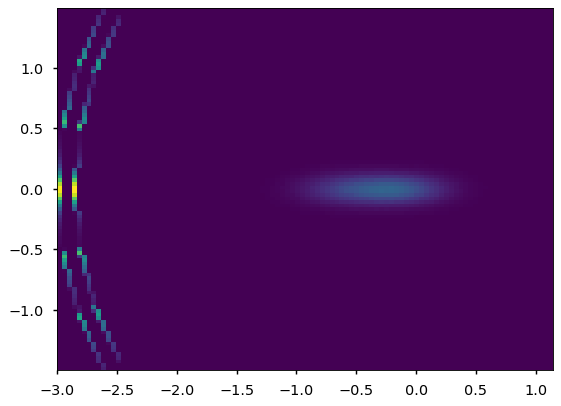

In [38]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
a= plt.hist2d(big_frame['Pos_X_[cm]'].to_numpy(), big_frame['Pos_Y_[cm]'].to_numpy(), bins=100)

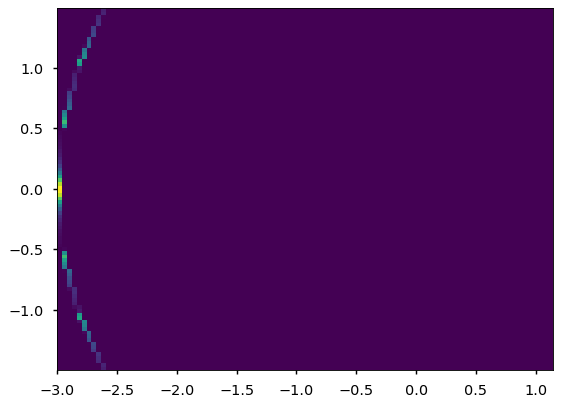

In [41]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
a= plt.hist2d(big_frame['Pos_X_[cm]'].to_numpy(), big_frame['Pos_Y_[cm]'].to_numpy(), weights= (np.abs(R_Series.to_numpy() - 2.98988255993219) <0.08), bins=100)

(1000000000000000.0, 1e+19)

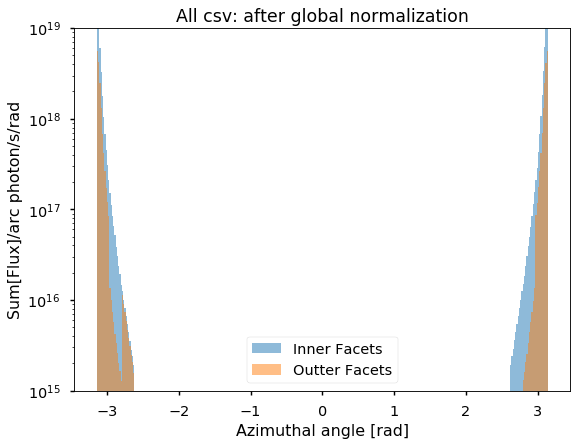

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360) * (np.abs(R_Series.to_numpy() - 2.843076590464656) <0.08 ),
    log = True, label = 'Inner Facets' , alpha = 0.5, lw=3);
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360) * (np.abs(R_Series.to_numpy() - 2.98988255993219) <0.08 ),
    log = True, label = 'Outter Facets', alpha = 0.5, lw=3 );



plt.legend()
plt.title('All csv: after global normalization');
plt.xlabel("Azimuthal angle [rad]");
plt.ylabel("Sum[Flux]/arc photon/s/rad");
plt.ylim((1e15,1e19))

Text(0, 0.5, 'Sum[Flux]/arc photon/s/rad')

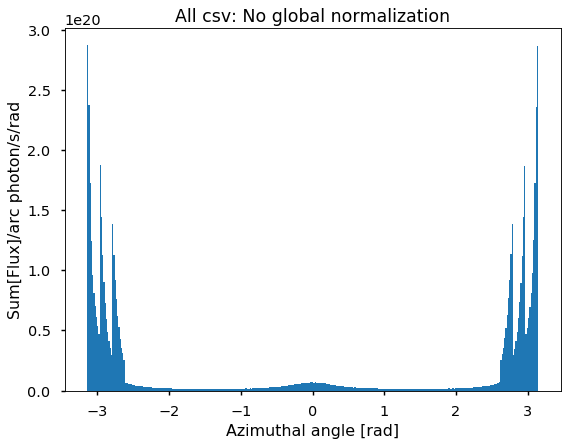

In [10]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_[photon/s]'].to_numpy() / (2*np.pi/360) );
plt.title('All csv: No global normalization')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")

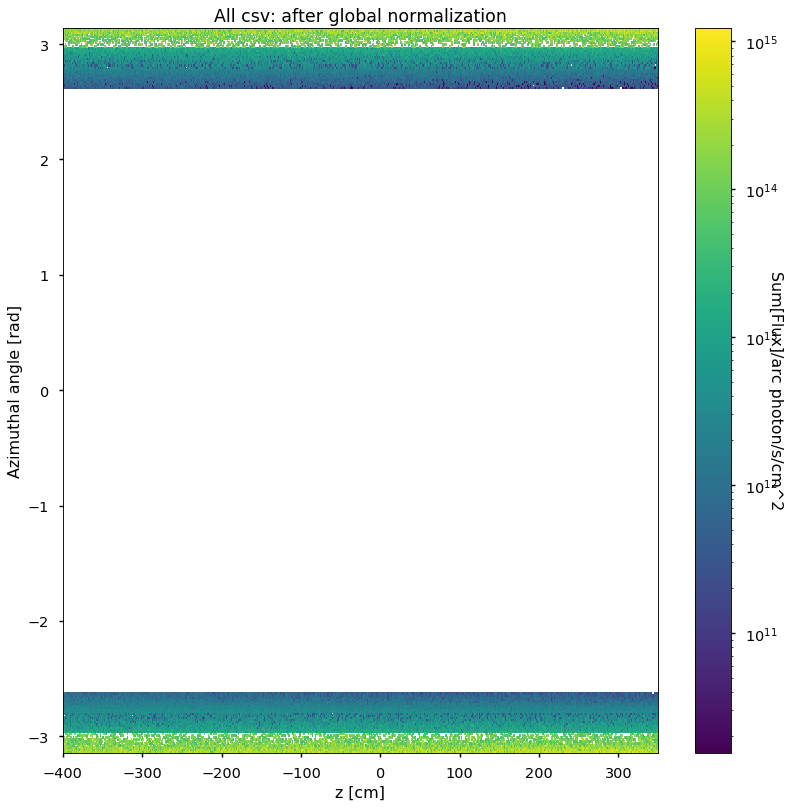

In [11]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


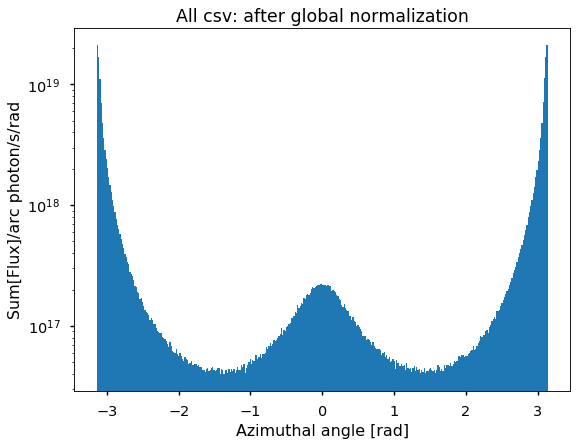

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame['Flux_Normalized'].to_numpy() / (2*np.pi/360),
    log = True );
plt.title('All csv: after global normalization');
plt.xlabel("Azimuthal angle [rad]");
plt.ylabel("Sum[Flux]/arc photon/s/rad");

Text(0, 0.5, 'Sum[Flux]/arc photon/s/rad')

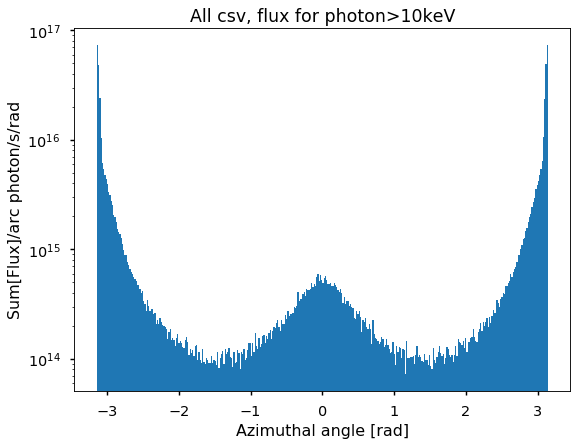

In [13]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Sum[Flux]/arc photon/s/rad")

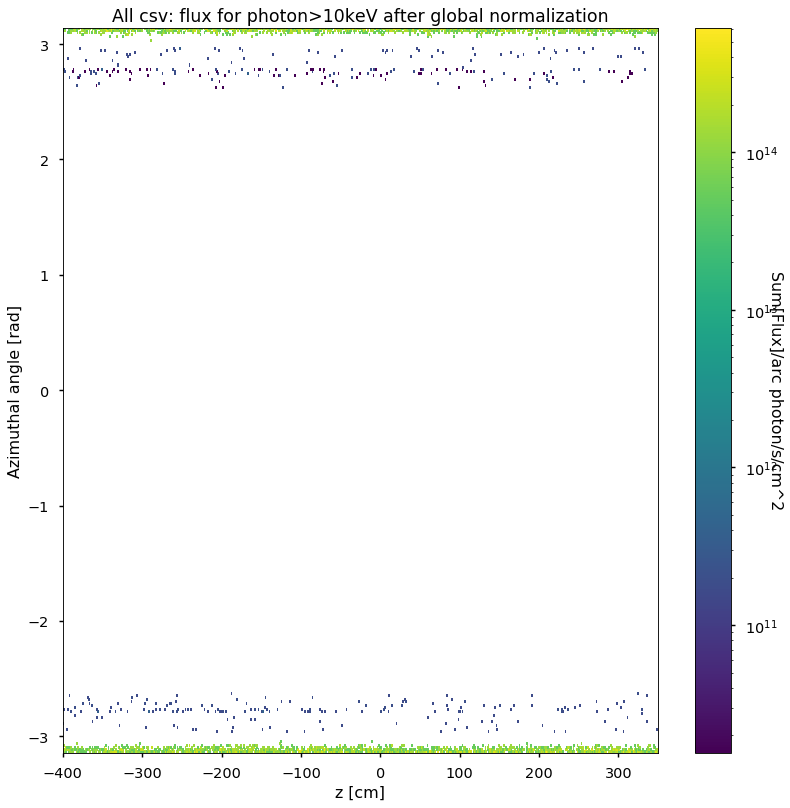

In [14]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>10keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)

<ipython-input-15-24066ce44001>:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.hist(


Text(0, 0.5, 'Sum[Flux] photon/s/cm')

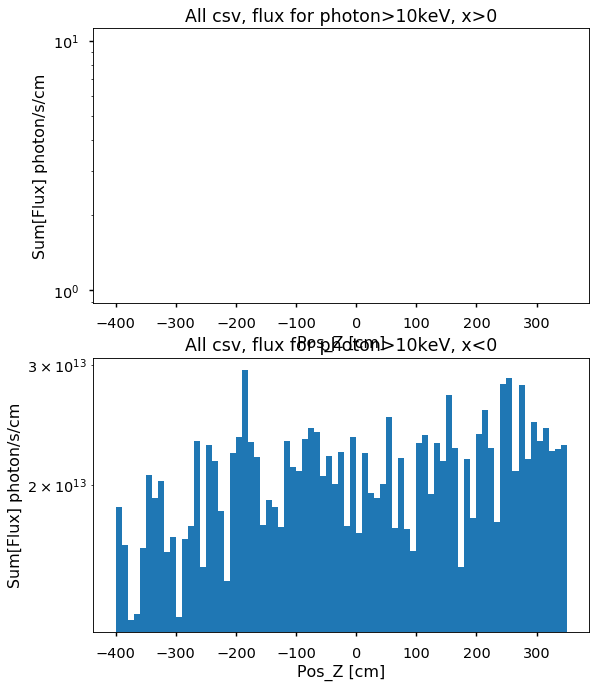

In [15]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x>0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

plt.subplot(2, 1, 2)
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True);
plt.title('All csv, flux for photon>10keV, x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

<ipython-input-16-ee32c566f387>:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.hist(


Text(0, 0.5, 'Sum[Flux] photon/s/cm')

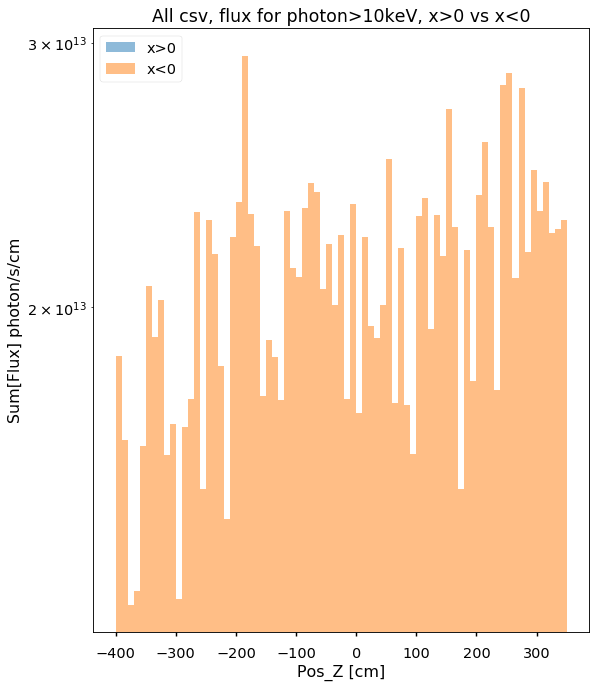

In [16]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True, label='x>0', alpha = 0.5, lw=3);
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0) * x['Flux_Normalized'] / 10, axis=1).to_numpy(),
    log = True, label='x<0', alpha = 0.5, lw=3);
plt.legend()

plt.title('All csv, flux for photon>10keV, x>0 vs x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] photon/s/cm")

<ipython-input-17-73fda00d6706>:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.hist(


Text(0, 0.5, 'Sum[Flux] virtual photon/cm')

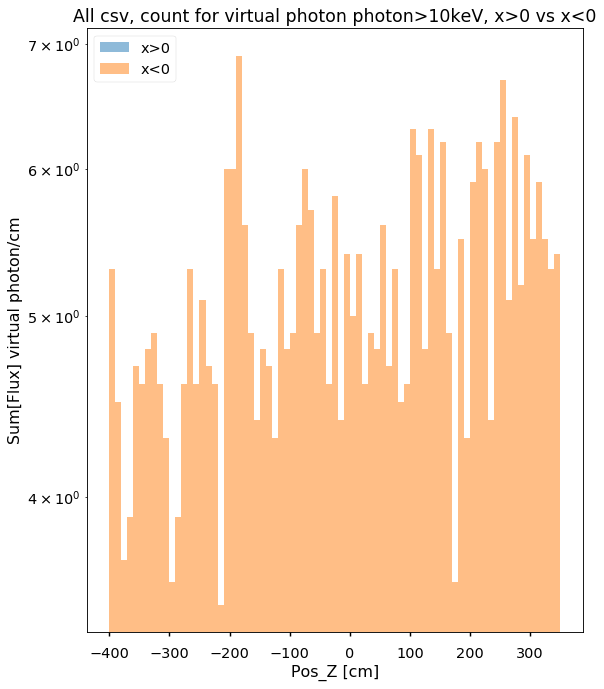

In [17]:
plt.figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']>0)  / 10, axis=1).to_numpy(),
    log = True, label='x>0', alpha = 0.5, lw=3);
plt.hist(
    big_frame['Pos_Z_[cm]'].to_numpy(), 
    bins=np.linspace(-400,350,num=75+1),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3 and x['Pos_X_[cm]']<0)  / 10, axis=1).to_numpy(),
    log = True, label='x<0', alpha = 0.5, lw=3);
plt.legend()

plt.title('All csv, count for virtual photon photon>10keV, x>0 vs x<0')
plt.xlabel("Pos_Z [cm]")
plt.ylabel("Sum[Flux] virtual photon/cm")

Text(0, 0.5, 'Virtual photon count per bin')

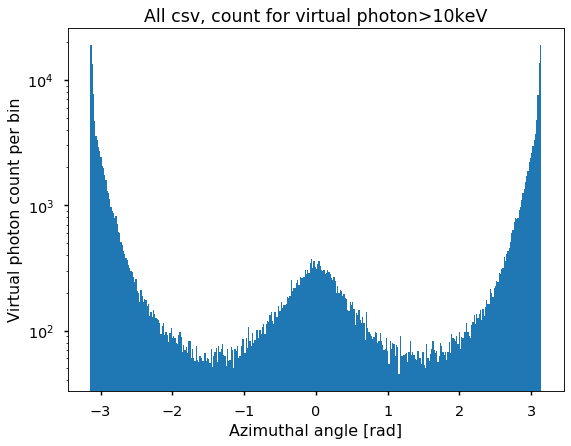

In [18]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>10keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

Text(0, 0.5, 'Virtual photon count per bin')

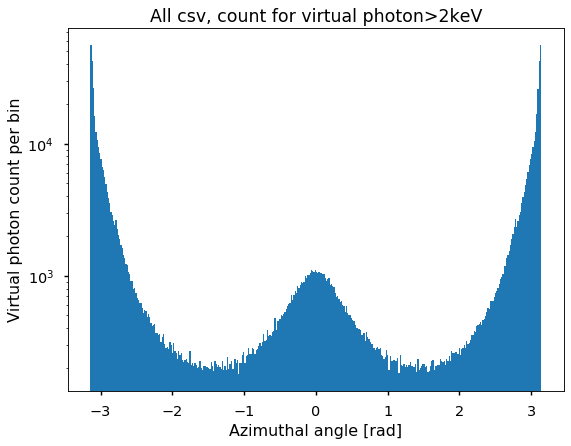

In [19]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(
    Phi.to_numpy(), 
    bins=np.linspace(-np.pi,np.pi,num=361),
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).to_numpy(),
    log = True);
plt.title('All csv, count for virtual photon>2keV')
plt.xlabel("Azimuthal angle [rad]")
plt.ylabel("Virtual photon count per bin")

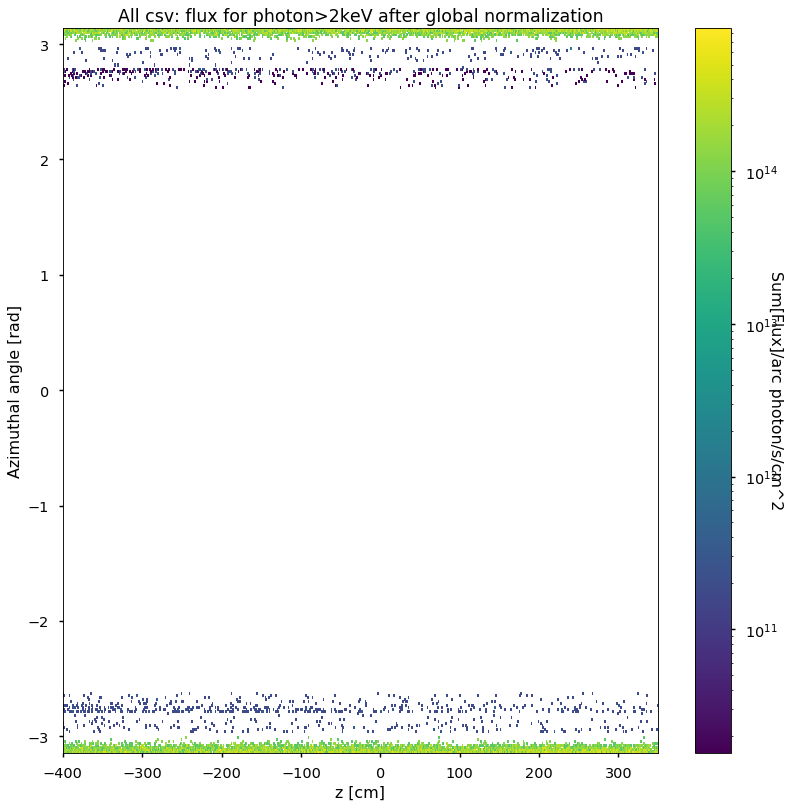

In [20]:
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
h = plt.hist2d(
    x = big_frame['Pos_Z_[cm]'],
    y = Phi.to_numpy(), 
    bins=[np.linspace(-400,350,num=750+1), np.linspace(-np.pi,np.pi,num=361) ] ,
    weights=big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3) * x['Flux_Normalized'], axis=1).to_numpy() / (2*np.pi*2.9/360),
    norm=mpl.colors.LogNorm());
plt.title('All csv: flux for photon>2keV after global normalization');
plt.xlabel("z [cm]");
plt.ylabel("Azimuthal angle [rad]");
cbar = plt.colorbar(h[3])
cbar.set_label('Sum[Flux]/arc photon/s/cm^2', rotation=270)


In [21]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>10e3), axis=1).sum()

199067

In [22]:
big_frame.apply(lambda x: int(x['Energy_[eV]']>2e3), axis=1).sum()

632360

In [23]:
# os.system('jupyter nbconvert --to html CheckAll.ipynb')
# os.system(f'mv CheckAll.html {base_dir}/')

In [26]:
# from time import sleep
# from IPython.display import display, Javascript
# import hashlib

# def save_notebook(file_path):
#     start_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
#     display(Javascript('IPython.notebook.save_checkpoint();'))
#     current_md5 = start_md5

#     while start_md5 == current_md5:
#         sleep(1)
#         current_md5 = hashlib.md5(open(file_path,'rb').read()).hexdigest()
        
#     print(f'saved to {file_path} {start_md5} -> {current_md5}');


# save_notebook('CheckAll.ipynb')
os.system('jupyter nbconvert --to html CheckAll-Validation.ipynb')
print(os.popen(f'mv -fv CheckAll-Validatio.html \'{base_dir}/\'').read())
